In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score

### Part A: Data Cleaning & Exploratory Analysis

In [2]:
# Import full data set using Pandas and verify the shape
df = pd.read_csv('bottle.csv')
df.shape

(864863, 74)

In [3]:
# Limit the dataset to specific columns and remove all NaN and NA values
df = df[['T_degC', 'Salnty', 'STheta']]
df = df.dropna()
df.shape

(812174, 3)

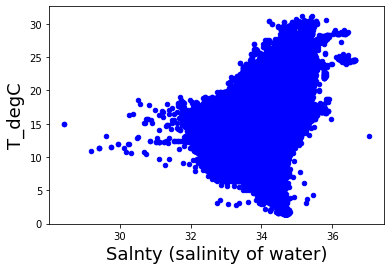

In [4]:
# Build the scatter plots using matplotlib

# Scatter: Salnty (salinity of water) vs T_degC
df.plot.scatter(x='Salnty', y='T_degC', color="b")
plt.xlabel('Salnty (salinity of water)', fontsize=18)
plt.ylabel('T_degC',fontsize=18)
plt.show()

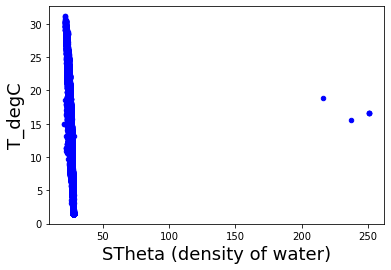

In [5]:
# Scatter: STheta (density of water) vs T_degC
df.plot.scatter(x='STheta', y='T_degC', color="b")
plt.xlabel('STheta (density of water)', fontsize=18)
plt.ylabel('T_degC',fontsize=18)
plt.show()

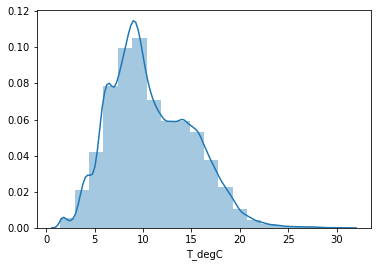

In [6]:
# Build the distribution plot using seaborn

# Distribution of T_degC 
sns.distplot(df['T_degC'], kde=True, bins=20) 

In [7]:
# Remove obvious outliers
df = df.loc[(df['STheta'] < 100)]
df.shape

(812168, 3)

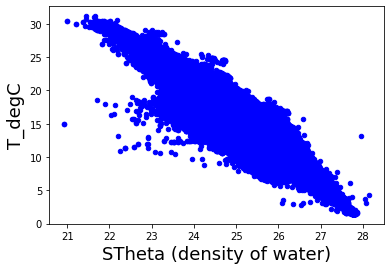

In [8]:
# Plot 3b again
df.plot.scatter(x='STheta', y='T_degC', color="b")
plt.xlabel('STheta (density of water)', fontsize=18)
plt.ylabel('T_degC',fontsize=18)
plt.show()

Plot 3b does look better because the data spread out after removing the outliers. The patter is more clear to analysis since the extream values were deleted and the main data was centered in the graph. 

### Part B: Train & Test Split

In [9]:
df.head()

,T_degC,Salnty,STheta
0,10.50,33.440,25.649
1,10.46,33.440,25.656
2,10.46,33.437,25.654
3,10.45,33.420,25.643
4,10.45,33.421,25.643


In [10]:
cols = list(df.columns.values) 
cols.pop(cols.index('T_degC')) 
X = df[cols] 
y = df["T_degC"]

In [11]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Part C: Linear Regression Using Normal Equation - Coded In Python

In [12]:
# Build the normal equation using numpy & fit using your training data (X_train & y_train)
print('X_train shape is:', X_train.shape)
X_train_shape = X_train.shape[0]
X_train_b = np.c_[np.ones((X_train_shape, 1)), X_train]
print('new X_train is:\n', X_train_b)

X_train shape is: (544152, 2)
new X_train is:
 [[ 1.    35.252 25.765]
 [ 1.    34.116 26.62 ]
 [ 1.    33.422 24.843]
 ...
 [ 1.    34.22  26.347]
 [ 1.    34.044 26.409]
 [ 1.    33.47  24.458]]


In [13]:
# Print out the coefficients
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train) # normal equation
print('the intercept and the two coefficients are:', theta_best)

the intercept and the two coefficients are: [35.63567092  3.11170178 -5.03898123]


In [14]:
# Predict T_degC for the test data using the fitted values in b
print('X_test shape is:', X_test.shape)
X_test_shape = X_test.shape[0]
X_test_b = np.c_[np.ones((X_test_shape, 1)), X_test]
print('new X_test is:\n', X_test_b)

y_pred = X_test_b.dot(theta_best)
print('the predicted y is:\n', y_pred)

X_test shape is: (268016, 2)
new X_test is:
 [[ 1.      34.309   26.694  ]
 [ 1.      34.149   26.741  ]
 [ 1.      34.514   27.348  ]
 ...
 [ 1.      33.3     24.066  ]
 [ 1.      33.54    25.638  ]
 [ 1.      33.6554  25.74107]]
the predicted y is:
 [ 7.88448234  7.14977794  5.22688748 ... 17.98721791 10.81274785
 10.65247044]


In [15]:
# Calculate the parameters for the test data
print('mean squared error:', mean_squared_error(y_test,y_pred))
print('r-squared:', r2_score(y_test,y_pred))
print('explained variance:', explained_variance_score(y_test,y_pred))

mean squared error: 0.2330680542498126
r-squared: 0.9869253631507576
explained variance: 0.9869253631545007


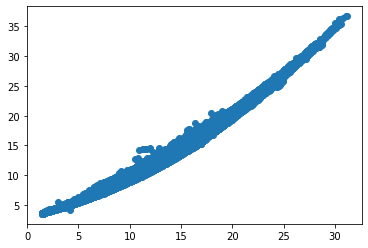

In [16]:
# Create a scatterplot that shows actual versus predicted values for the T_degC
plt.scatter(y_test,y_pred)

### Part D: Using sklearn API

In [17]:
# Create an instance of the LinearRegression class called "lin_reg". 
# Fit lin_reg using X_train & y_train

X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [18]:
# Print out the coefficients and the intercept
print('the intercept is:', lin_reg.intercept_)
print('the two coefficients are:', lin_reg.coef_)

the intercept is: 35.63567091847045
the two coefficients are: [ 3.11170178 -5.03898123]


In [19]:
# Predict T_degC for the test data using the fitted values in b
y_pred_sklearn = lin_reg.predict(X_test)
print(np.concatenate((y_pred_sklearn.reshape(len(y_pred_sklearn),1), y_test.reshape(len(y_test),1)),1))

[[ 7.88448234  8.28      ]
 [ 7.14977794  7.08      ]
 [ 5.22688748  4.56      ]
 ...
 [17.98721791 17.61      ]
 [10.81274785 11.02      ]
 [10.65247044 10.954     ]]


In [20]:
# Calculate the parameters for the test data
print('mean squared error:', mean_squared_error(y_test,y_pred_sklearn))
print('r-squared:', r2_score(y_test,y_pred_sklearn))
print('explained variance:', explained_variance_score(y_test,y_pred_sklearn))

mean squared error: 0.23306805424959232
r-squared: 0.98692536315077
explained variance: 0.9869253631545132


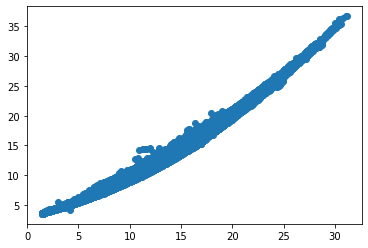

In [21]:
# Create a scatterplot that shows actual versus predicted values for the T_degC
plt.scatter(y_test,y_pred_sklearn)

### Part E: Conceptual Questions

1. Why is it important to have a test set?

---- The purpose of a test set is to give a final and unbiased performance measure of the entire model building process. We should finish any data preprocessing, algorithm selection, feature engineering, feature selection, hyper parameter tuning and model selection before put the model into the test set. We should also do the trade off between accuracy (training error) and generalization error before putting the model into the test test. 

2. If the normal equation always provides a solution, when would we not want to use it?

---- Normal Equation is computationally expensive if we have a very large number of features. We will  need to take the inverse of a n x n matrix in order to solve for the parameters data. Thus, if the number of feature is relatively small (eg: a hundred ~ ten thousand), then we can choose the normal equation. Otherwise, we should use other method. 

3. How might we improve the fit of our models from Part C & D?

---- Since we have already choose to use the linear regression model, we should improve it based on this paticular model we have. Exploratory analysis will be a good way to understand the relationship between the dependent variable and all the independent variables. It’s also important to check and treat the extreme values or outliers in the variables. Further deleting the outliers can remove the skewed result.  

4. As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff.

---- Bias can be defined as the difference between the Predicted values and the Expected values. When a Machine Learning model is unable to capture the true relationship between the features and target of the data, we have an error called Bias. When the model is too simplistic such that it does not consider even the important features of the training data, the model can be said to be underfitted.

---- Variance error is as a result of the model making too complex assumptions. In other words, the model has fit too closely to the training data. While it may return a high accuracy on training data, it does not necessarily translate into a good predictive model. The problem with the model fitting too closely to the training data is that it also captures noise or features which should in fact not be taken into consideration. This can also result in Overfitting.

---- We want to choose a model that both accurately captures the regularities in its training data, but also generalizes well to unseen data. 

5. In a linear regression model, how might we reduce bias?

---- Parameter tuning: We should understand thoroughly about the model and model parameters. Algorithms documentations are a good place to start. Every model has a list of parameters which it takes as inputs. Tweaking these parameters will give a more desirable results.

6. In a linear regression model, how might we reduce variance?

---- Increase the training dataset size: We should fit the model on more training data in order to find more accurate and general pattern. If the data is not readily available, we can use data augmentation methods to increase the data size. Also, a sensitivity analysis of training dataset size to prediction variance can be used to find the point of diminishing returns.